In [1]:
path = r"C:\Users\Data_Geeks\Desktop\Data Science projects\CatsVsDogs\Data\train\train"
training_data_dir = path + "\\train" # 10 000 * 2
validation_data_dir = path + "\\val" # 2 500 * 2
test_data_dir = r'C:\Users\Data_Geeks\Desktop\Data Science projects\CatsVsDogs\Data\test1\test1' # 12 500

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

import keras
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.models import Sequential
from keras import optimizers

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix

In [3]:
training_classes = os.listdir(training_data_dir)
print(training_classes)

pic = []
label = []
data = []

for i in training_classes:
    imgs_path1 = os.path.join(training_data_dir, i )    
    for img in os.listdir(imgs_path1):
        img_path = imgs_path1 + '\\' + img
        image_resized = Image.open(img_path).resize((150,150), Image.ANTIALIAS)
        data.append(np.array(image_resized))
        pic.append(img_path)
        label.append(i)

pic1 = np.array(pic)
label1 = np.array(label)
data1 = np.array(data)
print("success")


['cat', 'dog']
success


In [4]:
c = list(zip(pic1, label1 , data1))

random.shuffle(c)

pic2, label2 , data2 = zip(*c)

pic1 =  np.array(pic2)
label1 =  np.array(label2)
data1 =  np.array(data2)

print(pic1[1:3])
print(label1[1:3])
print(data1[1:3])

['C:\\Users\\Data_Geeks\\Desktop\\Data Science projects\\CatsVsDogs\\Data\\train\\train\\train\\cat\\cat.3631.jpg'
 'C:\\Users\\Data_Geeks\\Desktop\\Data Science projects\\CatsVsDogs\\Data\\train\\train\\train\\cat\\cat.6581.jpg']
['cat' 'cat']
[[[[ 89  56  50]
   [119  82  41]
   [ 79  38  14]
   ...
   [165 121  96]
   [156 112  87]
   [158 114  89]]

  [[ 81  48  41]
   [128  91  50]
   [ 87  47  23]
   ...
   [162 115  88]
   [157 111  84]
   [161 115  88]]

  [[ 88  55  48]
   [128  91  50]
   [ 93  53  29]
   ...
   [161 112  81]
   [162 112  82]
   [165 115  85]]

  ...

  [[ 57  47  48]
   [157 144 146]
   [149 132 138]
   ...
   [125 115 116]
   [156 143 150]
   [155 139 151]]

  [[ 68  57  57]
   [111  97  99]
   [132 115 120]
   ...
   [130 120 121]
   [155 142 149]
   [154 138 150]]

  [[ 69  56  56]
   [ 73  58  59]
   [ 84  65  69]
   ...
   [132 122 123]
   [153 140 147]
   [152 136 148]]]


 [[[107  93  48]
   [109 101  53]
   [102  98  49]
   ...
   [158 141  86]
   [1

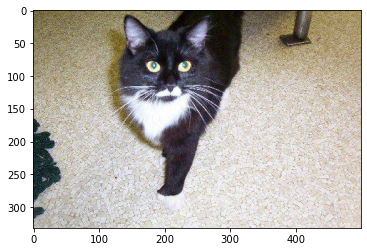

cat


In [5]:
i=2
data = plt.imread(pic1[i])
plt.imshow(data)
plt.show()
print(label1[i])

In [6]:
data1.shape

(20000, 150, 150, 3)

In [7]:
train_labels = np.array(pd.get_dummies(label1))
train_labels[:3]

array([[0, 1],
       [1, 0],
       [1, 0]], dtype=uint8)

# Validation data

In [8]:
validation_classes = os.listdir(validation_data_dir)
print(len(validation_classes))

pic_validation = []
label_validation = []
data_validation = []

for i in validation_classes:
    imgs_path1_validation = os.path.join(validation_data_dir, i )   
    for img in os.listdir(imgs_path1_validation):
        img_path_validation = imgs_path1_validation + '\\' + img
        image_resized_validation = Image.open(img_path_validation).resize((150,150), Image.ANTIALIAS)
        data_validation.append(np.array(image_resized_validation))
        pic_validation.append(img_path_validation)
        label_validation.append(i)

pic1_validation = np.array(pic_validation)
label1_validation = np.array(label_validation)
data1_validation = np.array(data_validation)
print("success")
print(pic1_validation[1:3])
print(label1_validation[1:3])
print(data1_validation[1:3])

2
success
['C:\\Users\\Data_Geeks\\Desktop\\Data Science projects\\CatsVsDogs\\Data\\train\\train\\val\\cat\\cat.10013.jpg'
 'C:\\Users\\Data_Geeks\\Desktop\\Data Science projects\\CatsVsDogs\\Data\\train\\train\\val\\cat\\cat.10018.jpg']
['cat' 'cat']
[[[[  4   4   4]
   [  6   6   6]
   [  6   6   6]
   ...
   [  4   5   3]
   [  4   4   2]
   [  5   5   5]]

  [[  4   4   4]
   [  6   6   6]
   [  6   6   6]
   ...
   [  5   5   3]
   [  4   5   2]
   [  6   6   6]]

  [[  4   4   4]
   [  6   6   6]
   [  6   6   6]
   ...
   [  5   5   3]
   [  4   5   2]
   [  6   6   6]]

  ...

  [[ 45  61  94]
   [ 41  55  87]
   [109 122 140]
   ...
   [ 81  52  26]
   [ 84  54  28]
   [ 81  56  26]]

  [[ 88 110 102]
   [ 44  60  79]
   [ 81  95 124]
   ...
   [ 78  49  21]
   [ 80  51  24]
   [ 80  55  25]]

  [[154 177 164]
   [ 65  83  97]
   [ 69  82 110]
   ...
   [ 76  47  20]
   [ 78  49  22]
   [ 77  52  22]]]


 [[[ 48  38  24]
   [ 36  28  18]
   [ 35  31  25]
   ...
   [ 71  62  7

In [9]:
c_validation = list(zip(pic1_validation, label1_validation , data1_validation))

random.shuffle(c_validation)

pic2_validation, label2_validation , data2_validation = zip(*c_validation)

pic1_validation =  np.array(pic2_validation)
label1_validation =  np.array(label2_validation)
data1_validation =  np.array(data2_validation)

print(pic1_validation[1:3])
print(label1_validation[1:3])
print(data1_validation[1:3])

['C:\\Users\\Data_Geeks\\Desktop\\Data Science projects\\CatsVsDogs\\Data\\train\\train\\val\\cat\\cat.9623.jpg'
 'C:\\Users\\Data_Geeks\\Desktop\\Data Science projects\\CatsVsDogs\\Data\\train\\train\\val\\cat\\cat.2154.jpg']
['cat' 'cat']
[[[[164 166 142]
   [163 165 141]
   [162 164 140]
   ...
   [187 208 201]
   [188 209 202]
   [188 209 202]]

  [[164 166 142]
   [163 165 141]
   [162 164 140]
   ...
   [188 209 202]
   [187 208 201]
   [185 206 199]]

  [[164 166 142]
   [163 165 141]
   [162 164 140]
   ...
   [188 209 202]
   [186 207 200]
   [184 205 198]]

  ...

  [[133 129  92]
   [129 124  93]
   [121 114  91]
   ...
   [184 190 178]
   [186 192 180]
   [182 188 176]]

  [[133 130  92]
   [132 127  95]
   [128 120  96]
   ...
   [185 192 179]
   [189 196 183]
   [185 193 180]]

  [[133 131  93]
   [132 127  94]
   [132 123  99]
   ...
   [179 187 175]
   [182 190 178]
   [181 189 177]]]


 [[[208 207 213]
   [206 205 211]
   [205 204 210]
   ...
   [102  46   8]
   [100  

# Reshape

In [10]:
input_shape = (150, 150, 3)
size  = 150*150*3

train_data = data1.reshape(20000, 150,150,3)  #   data1.reshape(20000, size) 
print(train_labels.shape)
print(train_data.shape)

(20000, 2)
(20000, 150, 150, 3)


In [11]:
val_labels = np.array(pd.get_dummies(label1_validation))
val_labels[:3]

val_data = data1_validation.reshape(5000, 150,150,3)  # data1_validation.reshape(5000, size)  
print(val_labels.shape)
print(val_data.shape)

(5000, 2)
(5000, 150, 150, 3)


[1 0]


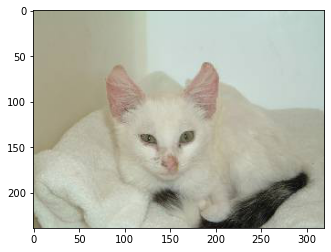

cat


In [31]:
i=1
print(val_labels[i])

data = plt.imread(pic1_validation[i])
plt.imshow(data)
plt.show()
print(label1[i])

[0 1]


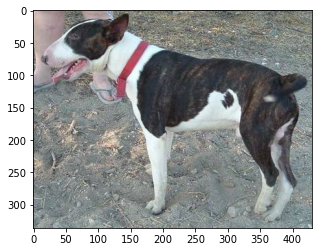

dog


In [13]:
i=6
print(train_labels[i])

data = plt.imread(pic1[i])
plt.imshow(data)
plt.show()
print(label1[i])

In [14]:
print(label1[1], train_labels[1])
print(label1_validation[1], val_labels[1])

cat [1 0]
cat [1 0]


# Model architecture

In [15]:
# Set up the model: model
model = Sequential()

#Add a convolutional layer


model.add(Conv2D(56, kernel_size=3, activation='relu', data_format='channels_last',
                                                        input_shape=input_shape ))
model.add(MaxPool2D(2))
model.add(Conv2D(28, kernel_size=3, activation='relu' ))
model.add(Conv2D(28, kernel_size=3, activation='relu' ))
model.add(MaxPool2D(2))

model.add(Flatten())

model.add(Dense(28, activation='relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(28, activation='relu'))

model.add(Dense(14, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(14, activation='relu'))

model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))

# # Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer =  'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

model.summary()

Loss function: categorical_crossentropy
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 56)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 56)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 28)        14140     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 28)        7084      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 34300)             0         
_________________________________________________________________
dense (Dense)   

In [16]:

# This checkpoint object will store the model parameters
# in the file "weights.hdf5"
checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss',
save_best_only=True)

# Store in a list to be used during training
callbacks_list = [checkpoint]

early_stopping_monitor = EarlyStopping(patience=3)

Epoch 1/10
469/469 [==============================] - 916s 2s/step - loss: 0.7219 - accuracy: 0.5038 - val_loss: 0.6905 - val_accuracy: 0.5166
Epoch 2/10
469/469 [==============================] - 874s 2s/step - loss: 0.6825 - accuracy: 0.5560 - val_loss: 0.6942 - val_accuracy: 0.4908
Epoch 3/10
469/469 [==============================] - 876s 2s/step - loss: 0.6894 - accuracy: 0.5339 - val_loss: 0.6904 - val_accuracy: 0.5498
Epoch 4/10
469/469 [==============================] - 873s 2s/step - loss: 0.6654 - accuracy: 0.6008 - val_loss: 0.6494 - val_accuracy: 0.6326
Epoch 5/10
469/469 [==============================] - 869s 2s/step - loss: 0.6345 - accuracy: 0.6474 - val_loss: 0.6475 - val_accuracy: 0.6324
Epoch 6/10
469/469 [==============================] - 853s 2s/step - loss: 0.6011 - accuracy: 0.6910 - val_loss: 0.6404 - val_accuracy: 0.6592
Epoch 7/10
469/469 [==============================] - 861s 2s/step - loss: 0.5559 - accuracy: 0.7255 - val_loss: 0.6243 - val_accuracy: 0.6632

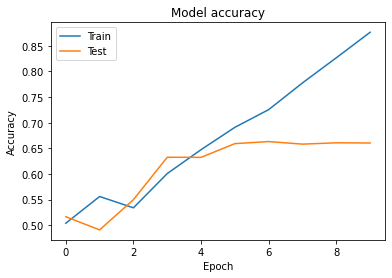

In [17]:
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"


history = model.fit(train_data, train_labels, validation_split=0.25, epochs=10,
                   callbacks=[callbacks_list,early_stopping_monitor],  verbose=1) 

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
print(model.metrics_names)

['loss', 'accuracy']


In [19]:
# Load the weights from file
model.load_weights('weights.hdf5')

# Predict from the first three images in the test data
model.predict(val_data[:7])

array([[0.20479932, 0.7952007 ],
       [0.7136066 , 0.2863934 ],
       [0.66287655, 0.33712345],
       [0.75550354, 0.24449648],
       [0.38780263, 0.61219734],
       [0.3500968 , 0.64990324],
       [0.7566933 , 0.24330676]], dtype=float32)

In [23]:

y_true = val_labels.T[:1]
y_pred =  model.predict_classes(val_data)
class_names=['dog','cat']

# plot_confusion_matrix function

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [25]:
y_true

array([0, 1, 1, ..., 1, 1, 0], dtype=uint8)

In [26]:
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [29]:
dict_ = pd.DataFrame({"true" : y_true,
        "pred": y_pred})
dict_['Match'] = dict_.true==dict_.pred
display(dict_.head())

dict_.value_counts()

,true,pred,Match
0,0,1,False
1,1,0,False
2,1,0,False
3,1,0,False
4,0,1,False


true  pred  Match
1     0     False    1757
0     1     False    1610
      0     True      890
1     1     True      743
dtype: int64

Confusion matrix, without normalization
[[ 890 1610]
 [1757  743]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

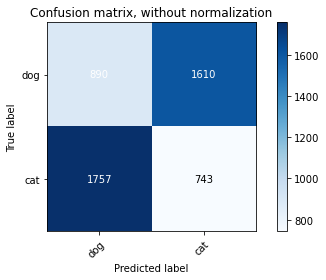

In [24]:
y_true = y_true.reshape(5000,)
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=False)

In [22]:
model.evaluate(val_data, val_labels)

157/157 [==============================] - 28s 180ms/step - loss: 0.6205 - accuracy: 0.6734


[0.6204807162284851, 0.6733999848365784]